# Data Science and Business Analytics Intern at SPARKS Foundation

# Author : Neeha Rawat

## To predict the percentage of an student based on the no. of study hours.

In [1]:
import pandas as pd #library to analyse and manipulate data
import numpy as np #library to perform mathematical operations
import matplotlib.pyplot as plt #library to visualize data

In [2]:
url="http://bit.ly/w-data"
d1=pd.read_csv(url) #to load data
print("Data imported successfully")

Data imported successfully


In [3]:
d1.head(10) #shows first 10 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
d1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing our dataset

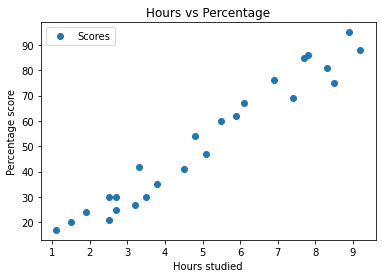

In [6]:
d1.plot(x="Hours",y="Scores",style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [7]:
X=d1.iloc[:,:-1].values 
y=d1.iloc[:,1].values

## Splitting the Data

In [8]:
from sklearn.model_selection import train_test_split #library to split data into training and test sets
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training Complete")

Training Complete


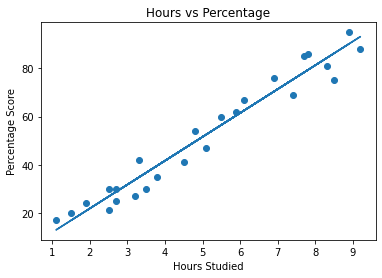

In [10]:
line=regressor.coef_ * X + regressor.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## Predicting the Percentage of Marks

In [11]:
print(X_test)
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


##  What will be predicted score if a student studies for 9.25 hrs/ day?

In [12]:
hours=9.25
own_pred = regressor.predict([[hours],])
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 93.69173248737535


### If a student studies for 9.25 hrs/day, his predicted score is 93.69%

## Evaluating Linear Regression using Mean Absolute Error and Mean Squared Error

In [13]:
from sklearn import metrics
print ('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print ('Mean Squared Error :',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.598769307217406


In [14]:
accuracy=regressor.score(X_test,y_test)
print("Accuracy",accuracy*100,"%")

Accuracy 94.54906892105355 %
